In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("end-use-prices-2023.csv")

df

,Unnamed: 0,Scenario,Region,Variable,Year,Value,Sector
0,1,Current Measures,Alberta,Electricity,2005,26.443732,Commercial
1,2,Current Measures,Alberta,Electricity,2006,29.555292,Commercial
2,3,Current Measures,Alberta,Electricity,2007,33.341482,Commercial
3,4,Current Measures,Alberta,Electricity,2008,42.558618,Commercial
4,5,Current Measures,Alberta,Electricity,2009,31.489354,Commercial
...,...,...,...,...,...,...,...
19729,19730,Global Net-zero,Yukon,Gasoline,2046,69.669648,Transportation
19730,19731,Global Net-zero,Yukon,Gasoline,2047,70.635367,Transportation
19731,19732,Global Net-zero,Yukon,Gasoline,2048,71.359459,Transportation
19732,19733,Global Net-zero,Yukon,Gasoline,2049,71.493244,Transportation


In [35]:
df = df.drop(columns=['Unnamed: 0'])
df

,Scenario,Region,Variable,Year,Value,Sector
0,Current Measures,Alberta,Electricity,2005,26.443732,Commercial
1,Current Measures,Alberta,Electricity,2006,29.555292,Commercial
2,Current Measures,Alberta,Electricity,2007,33.341482,Commercial
3,Current Measures,Alberta,Electricity,2008,42.558618,Commercial
4,Current Measures,Alberta,Electricity,2009,31.489354,Commercial
...,...,...,...,...,...,...
19729,Global Net-zero,Yukon,Gasoline,2046,69.669648,Transportation
19730,Global Net-zero,Yukon,Gasoline,2047,70.635367,Transportation
19731,Global Net-zero,Yukon,Gasoline,2048,71.359459,Transportation
19732,Global Net-zero,Yukon,Gasoline,2049,71.493244,Transportation


In [36]:
df.isna().sum()

Scenario    0
Region      0
Variable    0
Year        0
Value       0
Sector      0
dtype: int64

In [37]:
region = df['Region'].unique()
print(region)

df_region = {}
for types in region:
    # Seleccionar las filas que tienen el types actual
    df_types = df[df['Region'] == types].copy()  # Usar copy para evitar la vista
    # Agregar el DataFrame al diccionario con el types como clave
    df_region[types] = df_types.reset_index(drop=True)


['Alberta' 'British Columbia' 'Manitoba' 'New Brunswick'
 'Newfoundland and Labrador' 'Northwest Territories' 'Nova Scotia'
 'Nunavut' 'Ontario' 'Prince Edward Island' 'Quebec' 'Saskatchewan'
 'Yukon']


In [38]:
for k, v in df_region.items():
    print(f"DataFrame para tipo '{k}':")

DataFrame para tipo 'Alberta':
DataFrame para tipo 'British Columbia':
DataFrame para tipo 'Manitoba':
DataFrame para tipo 'New Brunswick':
DataFrame para tipo 'Newfoundland and Labrador':
DataFrame para tipo 'Northwest Territories':
DataFrame para tipo 'Nova Scotia':
DataFrame para tipo 'Nunavut':
DataFrame para tipo 'Ontario':
DataFrame para tipo 'Prince Edward Island':
DataFrame para tipo 'Quebec':
DataFrame para tipo 'Saskatchewan':
DataFrame para tipo 'Yukon':


In [39]:
for k, v in df_region.items():
    print(f"DataFrame para tipo '{k}':")
    print(v)

DataFrame para tipo 'Alberta':
              Scenario   Region     Variable  Year      Value          Sector
0     Current Measures  Alberta  Electricity  2005  26.443732      Commercial
1     Current Measures  Alberta  Electricity  2006  29.555292      Commercial
2     Current Measures  Alberta  Electricity  2007  33.341482      Commercial
3     Current Measures  Alberta  Electricity  2008  42.558618      Commercial
4     Current Measures  Alberta  Electricity  2009  31.489354      Commercial
...                ...      ...          ...   ...        ...             ...
1513   Global Net-zero  Alberta     Gasoline  2046  58.398945  Transportation
1514   Global Net-zero  Alberta     Gasoline  2047  59.537454  Transportation
1515   Global Net-zero  Alberta     Gasoline  2048  60.642316  Transportation
1516   Global Net-zero  Alberta     Gasoline  2049  61.606024  Transportation
1517   Global Net-zero  Alberta     Gasoline  2050  62.302721  Transportation

[1518 rows x 6 columns]
DataFram

In [40]:

for k, v in df_region.items():
    v = v.loc[v['Variable'] == 'Electricity']
    v = v.loc[v['Scenario'] == 'Current Measures']
    v = v.loc[v['Sector'] != 'Transportation']
    df_region[k] = v.reset_index(drop=True)
    print(f"DataFrame para tipo '{k}':")
    print(v)

DataFrame para tipo 'Alberta':
             Scenario   Region     Variable  Year      Value       Sector
0    Current Measures  Alberta  Electricity  2005  26.443732   Commercial
1    Current Measures  Alberta  Electricity  2006  29.555292   Commercial
2    Current Measures  Alberta  Electricity  2007  33.341482   Commercial
3    Current Measures  Alberta  Electricity  2008  42.558618   Commercial
4    Current Measures  Alberta  Electricity  2009  31.489354   Commercial
..                ...      ...          ...   ...        ...          ...
317  Current Measures  Alberta  Electricity  2046  68.099266  Residential
318  Current Measures  Alberta  Electricity  2047  68.618256  Residential
319  Current Measures  Alberta  Electricity  2048  69.082055  Residential
320  Current Measures  Alberta  Electricity  2049  69.546221  Residential
321  Current Measures  Alberta  Electricity  2050  70.034488  Residential

[138 rows x 6 columns]
DataFrame para tipo 'British Columbia':
             Scen

In [24]:
import os
for k, v in df_region.items():
    v.to_csv(os.path.join("precios/", f"Price_Electricity_{k}.csv"))

In [41]:
for k, v in df_region.items():
    print(k)
    print(v)

Alberta
             Scenario   Region     Variable  Year      Value       Sector
0    Current Measures  Alberta  Electricity  2005  26.443732   Commercial
1    Current Measures  Alberta  Electricity  2006  29.555292   Commercial
2    Current Measures  Alberta  Electricity  2007  33.341482   Commercial
3    Current Measures  Alberta  Electricity  2008  42.558618   Commercial
4    Current Measures  Alberta  Electricity  2009  31.489354   Commercial
..                ...      ...          ...   ...        ...          ...
133  Current Measures  Alberta  Electricity  2046  68.099266  Residential
134  Current Measures  Alberta  Electricity  2047  68.618256  Residential
135  Current Measures  Alberta  Electricity  2048  69.082055  Residential
136  Current Measures  Alberta  Electricity  2049  69.546221  Residential
137  Current Measures  Alberta  Electricity  2050  70.034488  Residential

[138 rows x 6 columns]
British Columbia
             Scenario            Region     Variable  Year     

In [43]:
for k, v in df_region.items():
    df_region[k] = v.drop(v[v['Year'] > 2023].index)
    print(df_region[k])
    print(v)

             Scenario   Region     Variable  Year      Value       Sector
0    Current Measures  Alberta  Electricity  2005  26.443732   Commercial
1    Current Measures  Alberta  Electricity  2006  29.555292   Commercial
2    Current Measures  Alberta  Electricity  2007  33.341482   Commercial
3    Current Measures  Alberta  Electricity  2008  42.558618   Commercial
4    Current Measures  Alberta  Electricity  2009  31.489354   Commercial
5    Current Measures  Alberta  Electricity  2010  26.870510   Commercial
6    Current Measures  Alberta  Electricity  2011  31.015941   Commercial
7    Current Measures  Alberta  Electricity  2012  34.243803   Commercial
8    Current Measures  Alberta  Electricity  2013  54.427595   Commercial
9    Current Measures  Alberta  Electricity  2014  29.780591   Commercial
10   Current Measures  Alberta  Electricity  2015  23.468608   Commercial
11   Current Measures  Alberta  Electricity  2016  24.535675   Commercial
12   Current Measures  Alberta  Electr

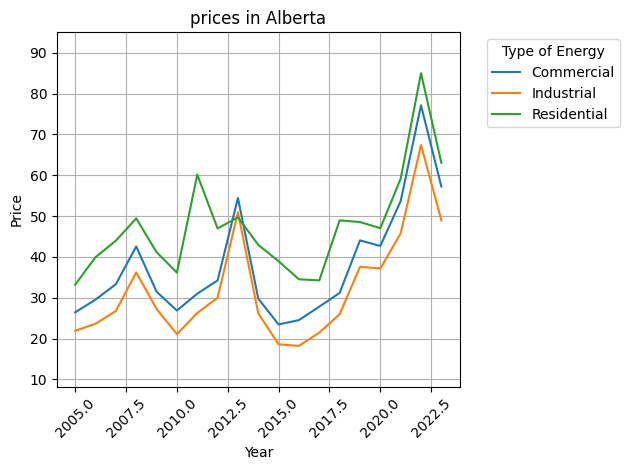

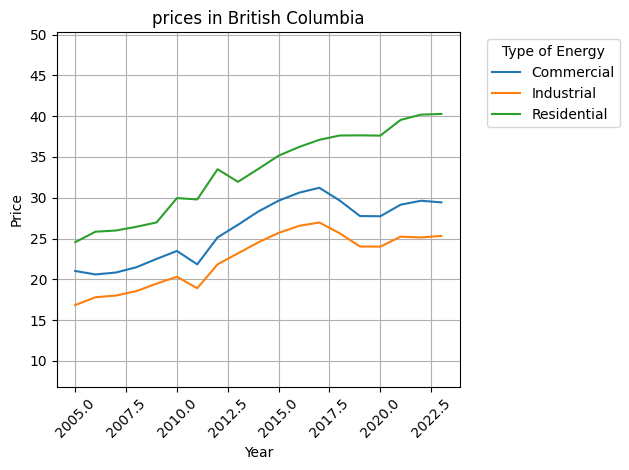

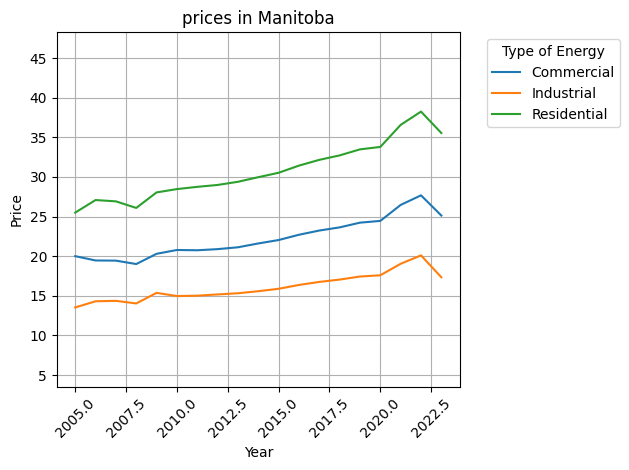

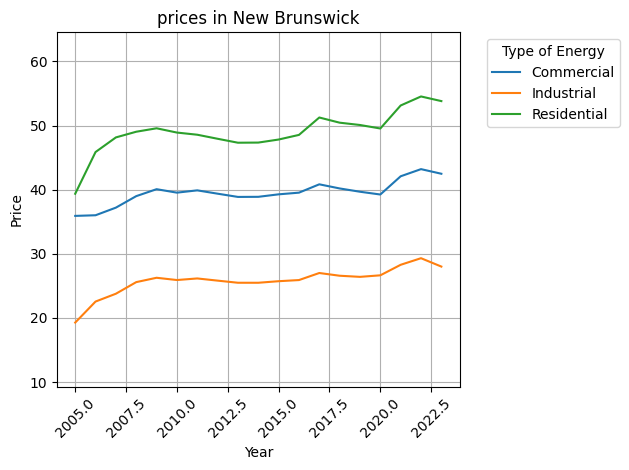

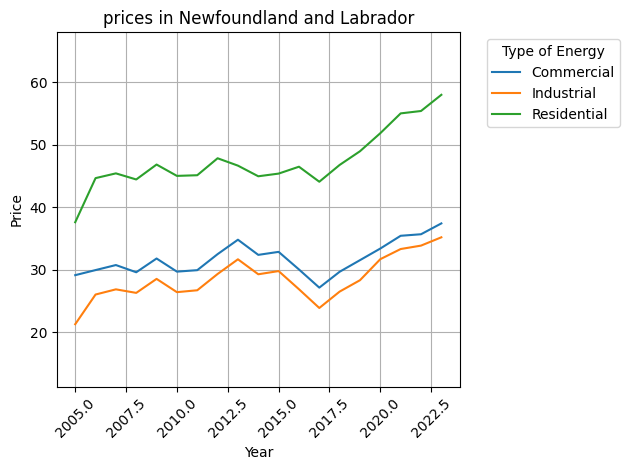

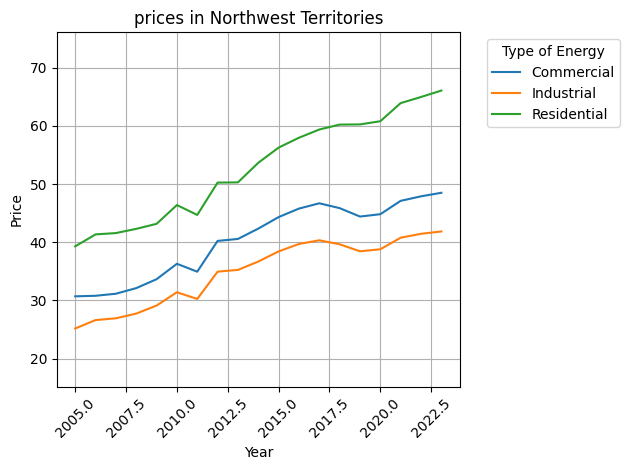

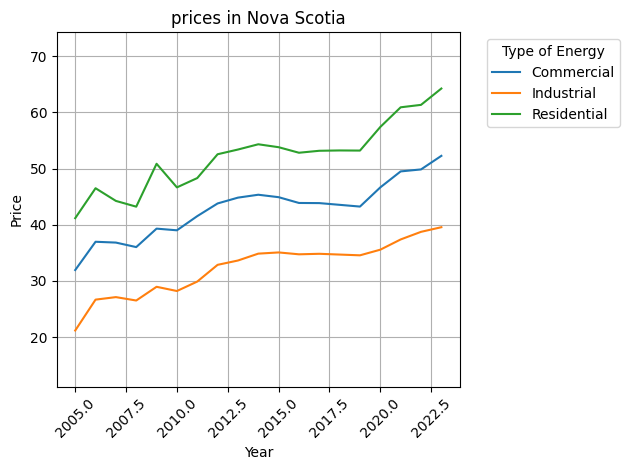

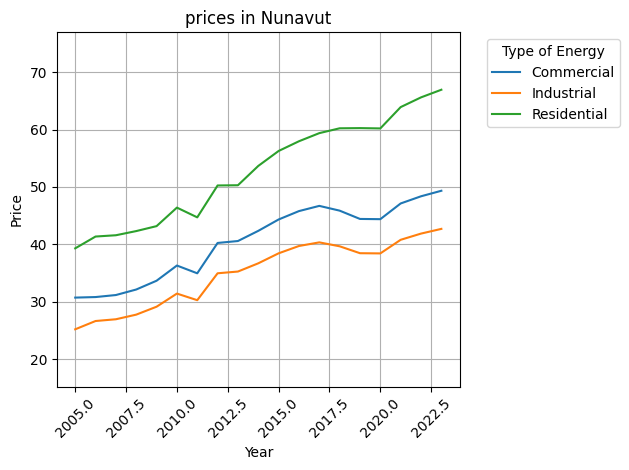

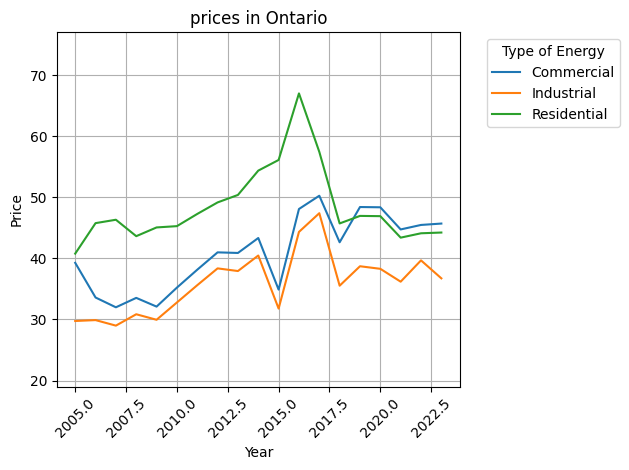

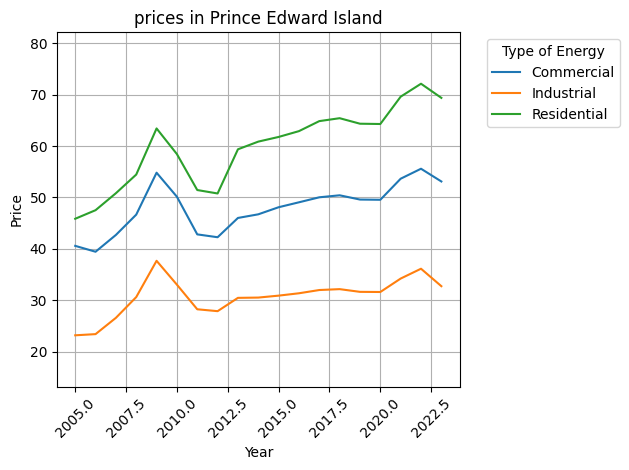

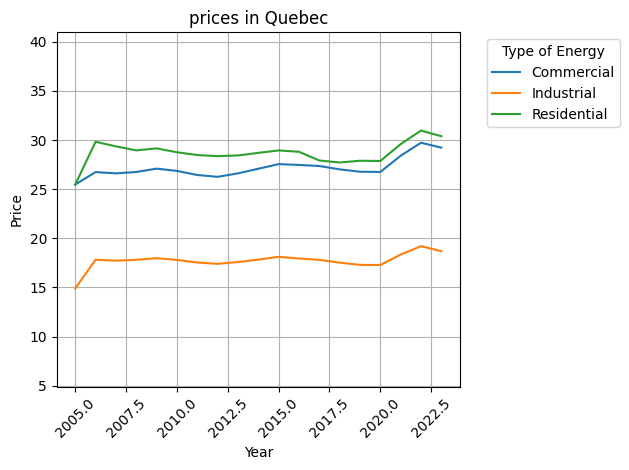

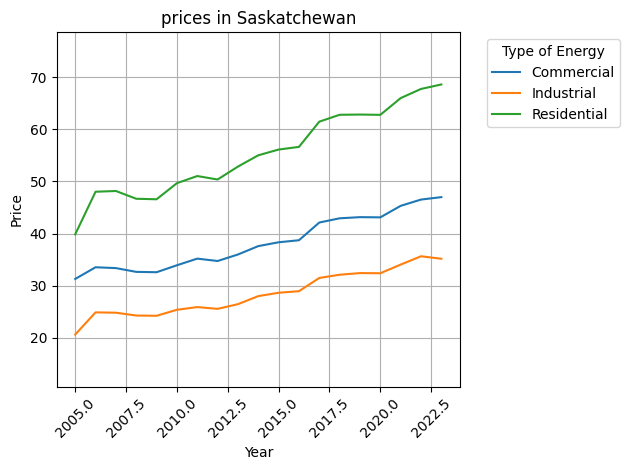

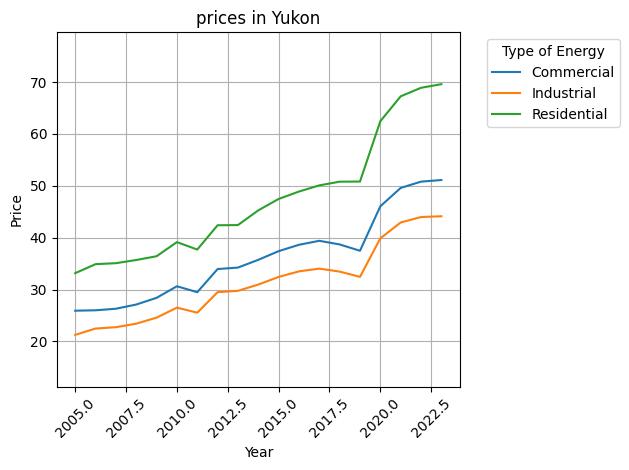

In [44]:
for k, v in df_region.items():
    fig, ax = plt.subplots()
    for sector in v['Sector'].unique():
        data_sector = v[v['Sector'] == sector]
        ax.plot(data_sector['Year'], data_sector['Value'], label=sector)
        plt.title(f'prices in {k}')
        plt.xlabel('Year')
        plt.ylabel('Price')
        plt.xticks( rotation=45)
        plt.grid(True)
        plt.ylim(min(v['Value']) - 10, max(v['Value']) + 10)
        # Show the plot
        plt.legend(title='Type of Energy', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(os.path.join("precios/", f"Prices in {k}"), bbox_inches = "tight", dpi=300)
